In [1]:
%cd ../

/home/users/dmoreno2016/VT_Model_for_LightCurves_Classification


/home/users/dmoreno2016/miniconda3/envs/visualtrans_git/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

import warnings
warnings.filterwarnings("ignore")

#os.environ["PATH"] = "/home/users/dmoreno2016/.TinyTeX/bin/x86_64-linux:" + os.environ["PATH"]

plt.rcParams.update({
    "text.usetex": True,
    "pgf.texsystem": "pdflatex",
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

%load_ext autoreload
%autoreload 2

In [3]:
from src.data.LitData import LitData
from scripts.utils import load_yaml

path_save_results = 'images'

In [16]:
config = load_yaml('./configs/online/run_config.yaml')['ft_classification']
config['loader']['fold'] = 0
config['debug'] = False
config['loader']['use_png'] = False

## Datasets

In [17]:
config['loader']['spc'] = None

dataset = LitData(
    name_dataset='elasticc_1',
    **config
    )

dataset.prepare_data()
dataset.setup(stage='test')

2025-06-18 22:17:23,979 - INFO - 🔄 Data Loading...
2025-06-18 22:17:23,981 - INFO -  -→ Opening chunk 01/32
2025-06-18 22:18:21,058 - INFO -  -→ Opening chunk 02/32
2025-06-18 22:18:27,683 - INFO -  -→ Opening chunk 03/32
2025-06-18 22:19:24,619 - INFO -  -→ Opening chunk 04/32
2025-06-18 22:19:31,785 - INFO -  -→ Opening chunk 05/32
2025-06-18 22:19:38,003 - INFO -  -→ Opening chunk 06/32
2025-06-18 22:20:07,692 - INFO -  -→ Opening chunk 07/32
2025-06-18 22:20:18,693 - INFO -  -→ Opening chunk 08/32
2025-06-18 22:20:21,829 - INFO -  -→ Opening chunk 09/32
2025-06-18 22:20:45,388 - INFO -  -→ Opening chunk 10/32
2025-06-18 22:21:02,261 - INFO -  -→ Opening chunk 11/32
2025-06-18 22:21:23,959 - INFO -  -→ Opening chunk 12/32
2025-06-18 22:22:23,270 - INFO -  -→ Opening chunk 13/32
2025-06-18 22:23:25,022 - INFO -  -→ Opening chunk 14/32
2025-06-18 22:23:28,241 - INFO -  -→ Opening chunk 15/32
2025-06-18 22:23:29,257 - INFO -  -→ Opening chunk 16/32
2025-06-18 22:24:26,733 - INFO -  -→ 

In [18]:
config['loader']['spc'] = 'all'

macho_dataset = LitData(
    name_dataset='macho',
    **config
    )

macho_dataset.prepare_data()
macho_dataset.setup(stage='test')

2025-06-18 22:35:30,212 - INFO - 🔄 Data Loading...
2025-06-18 22:35:32,116 - INFO -  -→ Opening chunk 2000/21460
2025-06-18 22:35:33,889 - INFO -  -→ Opening chunk 4000/21460
2025-06-18 22:35:35,894 - INFO -  -→ Opening chunk 6000/21460
2025-06-18 22:35:37,668 - INFO -  -→ Opening chunk 8000/21460
2025-06-18 22:35:39,454 - INFO -  -→ Opening chunk 10000/21460
2025-06-18 22:35:41,504 - INFO -  -→ Opening chunk 12000/21460
2025-06-18 22:35:43,278 - INFO -  -→ Opening chunk 14000/21460
2025-06-18 22:35:45,067 - INFO -  -→ Opening chunk 16000/21460
2025-06-18 22:35:47,214 - INFO -  -→ Opening chunk 18000/21460
2025-06-18 22:35:48,995 - INFO -  -→ Opening chunk 20000/21460
2025-06-18 22:35:50,296 - INFO -  -→ Opening chunk 21460/21460
2025-06-18 22:35:52,433 - INFO - ⚙️ Setting up the test dataset.
2025-06-18 22:35:53,533 - INFO - ✅ Test dataset setup completed.


In [19]:
config['loader']['spc'] = 'all'

macho_mb_dataset = LitData(
    name_dataset='macho_multiband',
    **config
    )

macho_mb_dataset.prepare_data()
macho_mb_dataset.setup(stage='test')

2025-06-18 22:35:53,727 - INFO - 🔄 Data Loading...
2025-06-18 22:35:57,531 - INFO -  -→ Opening chunk 2000/21460
2025-06-18 22:36:01,460 - INFO -  -→ Opening chunk 4000/21460
2025-06-18 22:36:05,078 - INFO -  -→ Opening chunk 6000/21460
2025-06-18 22:36:09,004 - INFO -  -→ Opening chunk 8000/21460
2025-06-18 22:36:12,975 - INFO -  -→ Opening chunk 10000/21460
2025-06-18 22:36:16,561 - INFO -  -→ Opening chunk 12000/21460
2025-06-18 22:36:20,161 - INFO -  -→ Opening chunk 14000/21460
2025-06-18 22:36:24,217 - INFO -  -→ Opening chunk 16000/21460
2025-06-18 22:36:27,798 - INFO -  -→ Opening chunk 18000/21460
2025-06-18 22:36:31,941 - INFO -  -→ Opening chunk 20000/21460
2025-06-18 22:36:34,557 - INFO -  -→ Opening chunk 21460/21460
2025-06-18 22:36:38,778 - INFO - ⚙️ Setting up the test dataset.
2025-06-18 22:36:40,411 - INFO - ✅ Test dataset setup completed.


In [138]:
import random
from collections import defaultdict
import matplotlib.pyplot as plt

def select_one_random_per_label(dataset, num_classes=6):
    """
    Devuelve exactamente un (id, obj_df, label) aleatorio por clase.

    Args
    ----
    dataset : iterable
        Produce tuplas (snid, obj_df, label)

    Returns
    -------
    selected_data : list[dict]
        [{'id': snid, 'object': obj_df, 'label': label}, …]
    selected_ids  : list[str]
        Lista de IDs seleccionados.
    """
    samples_per_label = defaultdict(list)
    for snid, obj_df, label in dataset.test_dataset.dataset:
        samples_per_label[label].append((snid, obj_df, label))

    # Aleatorizar las clases
    available_labels = list(samples_per_label.keys())
    random.shuffle(available_labels)
    chosen_labels = available_labels[:num_classes]

    # Tomar un ejemplo aleatorio por clase seleccionada
    selected_data, selected_ids = [], []
    for label in chosen_labels:
        snid, obj_df, label = random.choice(samples_per_label[label])
        selected_data.append({'id': snid, 'object': obj_df, 'label': dataset.inv_mapping_classes[label]})
        selected_ids.append(snid)

    #selected_data, selected_ids = [], []
    #for label, items in samples_per_label.items():
    #    snid, obj_df, label = random.choice(items)          # ← 1 aleatorio
    #    selected_data.append({'id': snid, 'object': obj_df, 'label': dataset.inv_mapping_classes[label]})
    #    selected_ids.append(snid)

    return selected_data, selected_ids


def generate_images_data(dataset_obj, selected_data, params_per_approach):
    """
    Genera las imágenes con create_image según distintos enfoques, sin plotear ni guardar aún.

    Args:
        dataset_obj: dataset que tiene `.create_image(obj_df)` y `.config`
        selected_data: lista de diccionarios con 'id', 'object', 'label'
        params_per_approach: diccionario con los hiperparámetros por enfoque

    Returns:
        List[Dict]: cada entrada contiene 'id', 'label', 'approach', 'image' (tensor)
    """
    all_results = []

    for approach, params in params_per_approach.items():
        # Configurar el dataset
        dataset_obj.config['imgs_params']['fig_params']['markersize'] = params['markersize']
        dataset_obj.config['imgs_params']['fig_params']['linewidth'] = params['linewidth']
        dataset_obj.config['imgs_params']['use_err'] = params['use_err']
        dataset_obj.config['imgs_params']['input_type'] = params['input_type']

        for entry in selected_data:
            snid = entry['id']
            obj_df = entry['object']
            label = entry['label']

            # Generar imagen (NO guardar ni plotear)
            image_tensor = dataset_obj.create_image(obj_df)

            # Guardar en memoria
            all_results.append({
                'id': snid,
                'label': label,
                'approach': approach,
                'image': image_tensor.numpy()  # aún como tensor, se puede convertir después
            })

    return all_results


def get_ids_and_labels(results, approach):
    seen = set()
    ids, labels = [], []
    for x in results:
        if x['approach'] == approach and x['id'] not in seen:
            seen.add(x['id'])
            ids.append(x['id'])
            labels.append(x['label'])
        if len(ids) == 6:
            break
    return ids, labels

def get_images(results, ids, approach):
    by_id = {x['id']: x for x in results if x['approach'] == approach}
    return [by_id[i]['image'] for i in ids]

def plot_macho_grid(macho_results, macho_mb_results, path_save_results):
    ids_macho, labels_macho = get_ids_and_labels(macho_results, 'overlay')

    macho_overlay_imgs    = get_images(macho_results, ids_macho, 'overlay')
    macho_mb_overlay_imgs = get_images(macho_mb_results, ids_macho, 'overlay')
    macho_mb_2grid_imgs   = get_images(macho_mb_results, ids_macho, '2grid')

    all_rows = [
        macho_overlay_imgs,
        macho_mb_overlay_imgs,
        macho_mb_2grid_imgs,
    ]
    row_titles = [
        "One-band",
        "Two-band (Overlay)",
        "Two-band (Grid)"
    ]

    fig, axs = plt.subplots(3, 6, figsize=(12, 8), constrained_layout=False)
    fig.subplots_adjust(wspace=0.0, hspace=-0.7)
    fig.text(0.5, 0.915, "MACHO", ha='center', fontsize=16, fontweight='bold')

    for row_idx, row_imgs in enumerate(all_rows):
        for col_idx, img in enumerate(row_imgs):
            ax = axs[row_idx, col_idx]
            ax.imshow(img)
            ax.set_xticks([])
            ax.set_yticks([])

            for spine in ax.spines.values():
                spine.set_visible(True)
                spine.set_linewidth(1.0)
                spine.set_edgecolor('black')

            if row_idx == 0:
                #ax.set_title(f"{ids_macho[col_idx]} - {labels_macho[col_idx]}", fontsize=14)
                ax.set_title(f"ID: {ids_macho[col_idx]}\nClass: {labels_macho[col_idx]}", fontsize=14)

                

    for i, label in enumerate(row_titles):
        axs[i, 0].text(-0.15, 0.5, label, va='center', ha='right',
                       fontsize=14, fontweight='bold', rotation=90,
                       transform=axs[i, 0].transAxes)

    plt.tight_layout()
    os.makedirs(path_save_results, exist_ok=True)
    plt.savefig(f"{path_save_results}/random_samples_macho.pdf", format='pdf', bbox_inches='tight')
    plt.show()

def plot_elasticc_grid(elasticc_results, path_save_results):
    ids_elasticc, labels_elasticc = get_ids_and_labels(elasticc_results, 'overlay')

    elasticc_overlay_imgs = get_images(elasticc_results, ids_elasticc, 'overlay')
    elasticc_6grid_imgs   = get_images(elasticc_results, ids_elasticc, '6grid')

    all_rows = [
        elasticc_overlay_imgs,
        elasticc_6grid_imgs,
    ]
    row_titles = [
        "Six-band (Overlay)",
        "Six-band (Grid)"
    ]

    fig, axs = plt.subplots(2, 6, figsize=(12, 6), constrained_layout=False)
    fig.subplots_adjust(wspace=0.0, hspace=-0.7)
    fig.text(0.5, 0.905, "ELAsTiCC", ha='center', fontsize=16, fontweight='bold')

    for row_idx, row_imgs in enumerate(all_rows):
        for col_idx, img in enumerate(row_imgs):
            ax = axs[row_idx, col_idx]
            ax.imshow(img)
            ax.set_xticks([])
            ax.set_yticks([])

            for spine in ax.spines.values():
                spine.set_visible(True)
                spine.set_linewidth(1.0)
                spine.set_edgecolor('black')

            if row_idx == 0:
                ax.set_title(f"ID: {ids_elasticc[col_idx]}\nClass: {labels_elasticc[col_idx]}", fontsize=14)
                #ax.set_title(f"{ids_elasticc[col_idx]} - {labels_elasticc[col_idx]}", fontsize=14)

    for i, label in enumerate(row_titles):
        axs[i, 0].text(-0.15, 0.5, label, va='center', ha='right',
                       fontsize=14, fontweight='bold', rotation=90,
                       transform=axs[i, 0].transAxes)

    plt.tight_layout()
    os.makedirs(path_save_results, exist_ok=True)
    plt.savefig(f"{path_save_results}/random_samples_elasticc.pdf", format='pdf', bbox_inches='tight')
    plt.show()

In [139]:
# MACHO MB (dos bandas)
best_macho_mb_params = {
    'overlay': {
        'markersize': 1.0,
        'linewidth': 2.0,
        'use_err': True,
        'input_type': 'overlay',
    },
    '2grid': {
        'markersize': 3.0,
        'linewidth': 1.5,
        'use_err': True,
        'input_type': '2grid',
    },
}

# MACHO (una banda)
best_macho_params = {
    'overlay': {
        'markersize': 1.0,
        'linewidth': 2.0,
        'use_err': True,
        'input_type': 'overlay',
    }
}

# ELAsTiCC
best_elasticc_1_params = {
    'overlay': {
        'markersize': 2.0,
        'linewidth': 0.5,
        'use_err': True,
        'input_type': 'overlay',
    },
    '6grid': {
        'markersize': 5.0,
        'linewidth': 2.0,
        'use_err': True,
        'input_type': '6grid',
    },
}


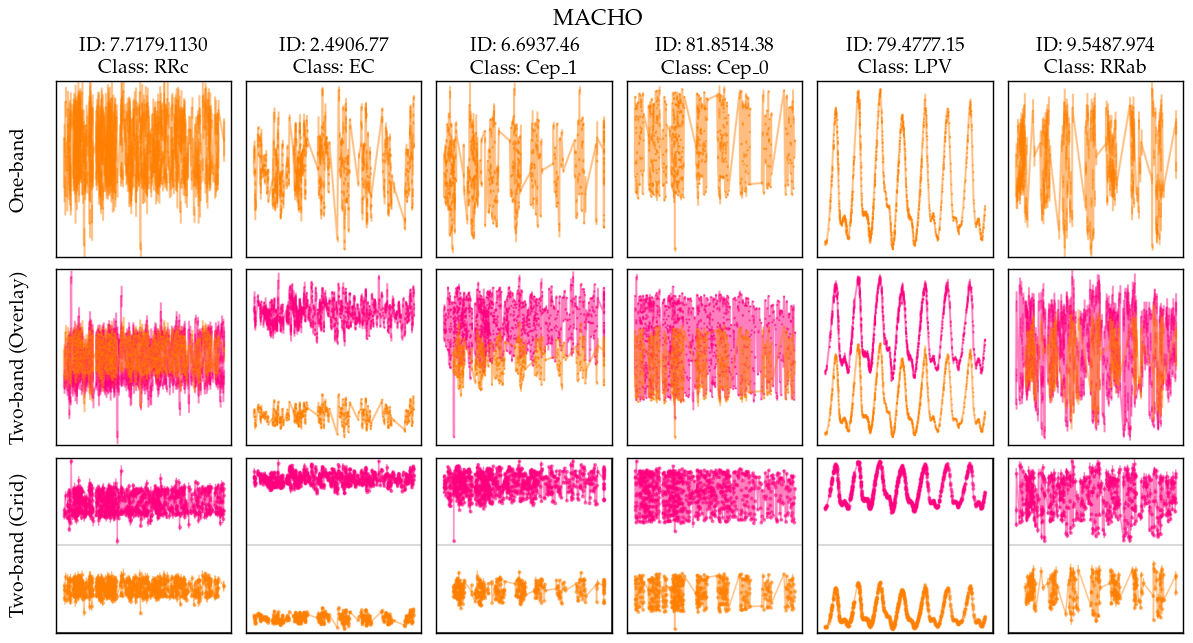

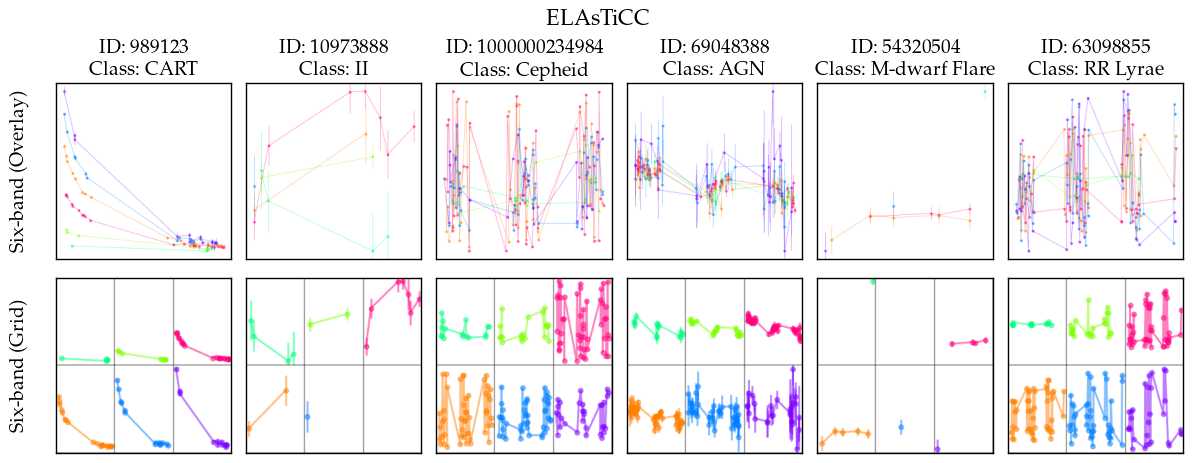

In [146]:
# --- MACHO (una banda) -------------------------
selected_macho, selected_ids_macho = select_one_random_per_label(
    macho_dataset, num_classes=6
)

# --- MACHO MB (dos bandas) ---------------------
matched_data = [
    {'id': snid, 'object': obj_df, 'label': macho_mb_dataset.inv_mapping_classes[label]}
    for snid, obj_df, label in macho_mb_dataset.test_dataset.dataset
    if snid in selected_ids_macho
]
ordered_matched_data = matched_data  # ya está en el mismo orden

# --- ELAsTiCC ---------------------------------
selected_elasticc, selected_ids_elasticc = select_one_random_per_label(
    dataset, num_classes=6
)

# 1. Seleccionar uno por clase
selected_macho, selected_ids_macho = select_one_random_per_label(
    macho_dataset, num_classes=6
)
matched_data = [
    {'id': snid, 'object': obj_df, 'label': label}
    for snid, obj_df, label in macho_mb_dataset.test_dataset.dataset
    if snid in selected_ids_macho
]
selected_elasticc, _ = select_one_random_per_label(
    dataset, num_classes=6
)

# 2. Crear imágenes
macho_results = generate_images_data(
    macho_dataset.test_dataset, selected_macho, best_macho_params
)
macho_mb_results = generate_images_data(
    macho_mb_dataset.test_dataset, matched_data, best_macho_mb_params
)
elasticc_results = generate_images_data(
    dataset.test_dataset, selected_elasticc, best_elasticc_1_params
)

# 3. Graficar
path_save_results = 'images'
plot_macho_grid(macho_results, macho_mb_results, path_save_results)
plot_elasticc_grid(elasticc_results, path_save_results)